In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Combined Data.csv')

# Display the first few rows to confirm it's loaded correctly
print(data.head())


   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64


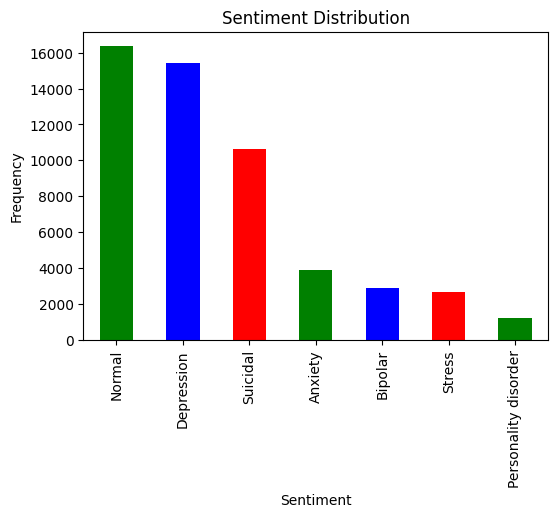

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load dataset
data = pd.read_csv('/content/Combined Data.csv', on_bad_lines='skip')

# Sentiment distribution
status_counts = data['status'].value_counts()
print(status_counts)

# Plot distribution
plt.figure(figsize=(6,4))
status_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!rm -rf /root/nltk_data


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure all NLTK resources are properly downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line was added to fix the error

# Define the preprocessing function
def preprocess(text):
    # Check if the input is a string, if not, convert it to string
    if not isinstance(text, str):
        text = str(text)

    # Tokenization and lowercasing
    tokens = word_tokenize(text.lower())

    # Remove non-alphanumeric tokens
    tokens = [t for t in tokens if t.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    return " ".join(tokens)

# Load dataset
data = pd.read_csv('/content/Combined Data.csv')  # Replace with your actual path

# Apply preprocessing to the 'statement' column
data['cleaned_statement'] = data['statement'].apply(preprocess)

# Display a few rows to verify the preprocessing
print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


   Unnamed: 0                                          statement   status  \
0           0                                         oh my gosh  Anxiety   
1           1  trouble sleeping, confused mind, restless hear...  Anxiety   
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety   
3           3  I've shifted my focus to something else but I'...  Anxiety   
4           4  I'm restless and restless, it's been a month n...  Anxiety   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3         shifted focus something else still worried  
4                   restless restless month boy mean  


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('/content/Combined Data.csv')

# Verify column names
print(data.columns)

# Preprocessing function
def preprocess(text):
    if isinstance(text, str):  # Check if the value is a string
        tokens = word_tokenize(text.lower())  # Tokenize and lowercase
        tokens = [t for t in tokens if t.isalnum()]  # Remove punctuation
        tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize tokens
        return " ".join(tokens)
    else:
        return ""  # Return empty string if the value is not a string

# Apply preprocessing
data['cleaned_statement'] = data['statement'].apply(preprocess)

# Verify new column
print(data[['statement', 'cleaned_statement']].head())

# Vectorize the cleaned statements
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_statement'])  # Features
y = data['status']  # Target labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['Unnamed: 0', 'statement', 'status'], dtype='object')
                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   

                                   cleaned_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3         shifted focus something else still worried  
4                   restless restless month boy mean  


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      precision    recall  f1-score   support

             Anxiety       0.77      0.75      0.76       779
             Bipolar       0.79      0.70      0.74       580
          Depression       0.71      0.68      0.69      3100
              Normal       0.86      0.95      0.90      3327
Personality disorder       0.72      0.51      0.60       248
              Stress       0.59      0.50      0.54       557
            Suicidal       0.62      0.62      0.62      2018

            accuracy                           0.75     10609
           macro avg       0.72      0.67      0.69     10609
        weighted avg       0.74      0.75      0.74     10609



# Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Vectorize text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_statement'])
y = data['status']  # Assuming 'status' contains labels

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7475728155339806
                      precision    recall  f1-score   support

             Anxiety       0.77      0.75      0.76       779
             Bipolar       0.78      0.70      0.74       580
          Depression       0.70      0.67      0.69      3100
              Normal       0.88      0.95      0.91      3327
Personality disorder       0.61      0.62      0.61       248
              Stress       0.60      0.48      0.54       557
            Suicidal       0.62      0.62      0.62      2018

            accuracy                           0.75     10609
           macro avg       0.71      0.69      0.70     10609
        weighted avg       0.74      0.75      0.74     10609



# Support Vector Machine (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (make sure this is done only once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
data = pd.read_csv('/content/Combined Data.csv')

# Preprocessing function
def preprocess(text):
    # Handle missing values
    if isinstance(text, str):  # Ensure text is a string
        tokens = word_tokenize(text.lower())  # Tokenize and lowercase
        tokens = [t for t in tokens if t.isalnum()]  # Remove punctuation
        tokens = [t for t in tokens if t not in stopwords.words('english')]  # Remove stopwords
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(t) for t in tokens]  # Lemmatize
        return " ".join(tokens)
    else:
        return ""  # Return empty string if the value is not a valid string

# Apply preprocessing to 'statement' column
data['cleaned_statement'] = data['statement'].apply(preprocess)

# Features (X) and target (y)
X = data['cleaned_statement']
y = data['status']  # Assuming 'status' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data into numerical features (TF-IDF vectorizer)
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7274012630785183
                      precision    recall  f1-score   support

             Anxiety       0.72      0.70      0.71       779
             Bipolar       0.83      0.59      0.69       580
          Depression       0.65      0.71      0.68      3100
              Normal       0.83      0.94      0.88      3327
Personality disorder       0.93      0.28      0.43       248
              Stress       0.68      0.36      0.47       557
            Suicidal       0.65      0.61      0.63      2018

            accuracy                           0.73     10609
           macro avg       0.76      0.60      0.64     10609
        weighted avg       0.73      0.73      0.72     10609



# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7081723065321897
                      precision    recall  f1-score   support

             Anxiety       0.79      0.56      0.66       779
             Bipolar       0.90      0.52      0.66       580
          Depression       0.60      0.76      0.67      3100
              Normal       0.82      0.93      0.87      3327
Personality disorder       1.00      0.35      0.51       248
              Stress       0.92      0.29      0.44       557
            Suicidal       0.62      0.53      0.58      2018

            accuracy                           0.71     10609
           macro avg       0.81      0.56      0.63     10609
        weighted avg       0.73      0.71      0.70     10609



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_nb = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.6272975775285136
                      precision    recall  f1-score   support

             Anxiety       0.76      0.51      0.61       779
             Bipolar       0.84      0.33      0.47       580
          Depression       0.50      0.78      0.61      3100
              Normal       0.75      0.79      0.77      3327
Personality disorder       1.00      0.10      0.19       248
              Stress       0.92      0.08      0.15       557
            Suicidal       0.67      0.46      0.55      2018

            accuracy                           0.63     10609
           macro avg       0.78      0.44      0.48     10609
        weighted avg       0.68      0.63      0.61     10609



# Deep Learning (LSTM - Long Short-Term Memory Network)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cleaned_statement'])
X = tokenizer.texts_to_sequences(data['cleaned_statement'])
X = pad_sequences(X, maxlen=100)

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(data['status'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile and train
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Predictions and evaluation
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 315s 292ms/step - accuracy: 0.0545 - loss: -52.0611 - val_accuracy: 0.0551 - val_loss: -161.6703
Epoch 2/5
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 325s 295ms/step - accuracy: 0.0549 - loss: -197.8662 - val_accuracy: 0.0551 - val_loss: -303.5768
Epoch 3/5
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 335s 316ms/step - accuracy: 0.0552 - loss: -337.7861 - val_accuracy: 0.0551 - val_loss: -444.6438
Epoch 4/5
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 336s 316ms/step - accuracy: 0.0520 - loss: -483.0902 - val_accuracy: 0.0551 - val_loss: -585.1141
Epoch 5/5
1061/1061 ━━━━━━━━━━━━━━━━━━━━ 384s 318ms/step - accuracy: 0.0536 - loss: -621.4332 - val_accuracy: 0.0551 - val_loss: -725.6924
332/332 ━━━━━━━━━━━━━━━━━━━━ 37s 111ms/step - accuracy: 0.0526 - loss: -712.0520
LSTM Accuracy: 5.47%


# BERT (Transformers for Sentiment Analysis)

In [ ]:
from transformers import pipeline

# Load a pre-trained BERT model for sentiment analysis
sentiment_pipeline = pipeline("sentiment-analysis")

# Predict sentiment
predictions = sentiment_pipeline(data['cleaned_statement'].iloc[:5].tolist())
print(predictions)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.994956910610199}, {'label': 'NEGATIVE', 'score': 0.9404727816581726}, {'label': 'NEGATIVE', 'score': 0.9917205572128296}, {'label': 'NEGATIVE', 'score': 0.9621964693069458}, {'label': 'NEGATIVE', 'score': 0.9977778792381287}]


# Confusion Matrix:

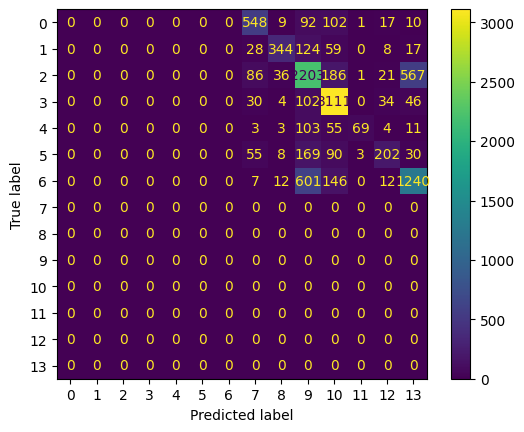

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Convert all labels to string type to avoid mixed types
y_train = y_train.astype(str)
y_test = y_test.astype(str)
y_pred_svm = y_pred_svm.astype(str)

# Fit LabelEncoder on the combined classes from both y_train and y_pred_svm
le = LabelEncoder()
le.fit(np.concatenate([y_train, y_pred_svm]))

# Transform both y_test and y_pred_svm using the same encoder
y_test_encoded = le.transform(y_test)
y_pred_encoded = le.transform(y_pred_svm)

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred_encoded)


# Linear regression and confusion matrix

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')
Accuracy: 0.7482326326703742
Precision: 0.7447103108441133
Recall: 0.7482326326703742
F1-score: 0.7424992785427265
Confusion Matrix:
 [[ 584   14   70   72   14   19    6]
 [  21  362  108   36   33    9   11]
 [  67   31 2176  200    4   21  601]
 [  17    3   76 3148    3   31   49]
 [   7    8   62   23  127   10   11]
 [  60    6  141   82   15  225   28]
 [   5    4  529  154    0   10 1316]]


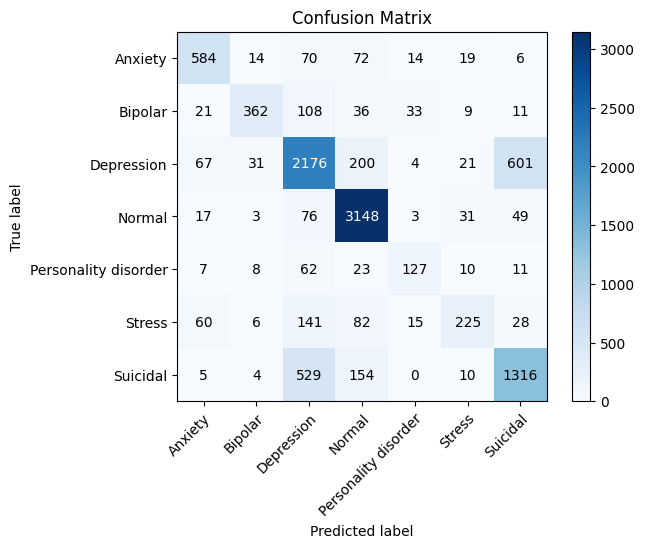

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Combined Data.csv')  # Path to your dataset

# Print the column names to verify
print(data.columns)

# Handle missing values in the 'statement' column (replace NaN with a placeholder string)
data['statement'] = data['statement'].fillna('No statement available')

# Separate features and target variable
X = data['statement']  # Column with the text data
y = data['status']  # Column with the sentiment labels (e.g., 'positive', 'negative', etc.)

# Handle missing values in the target variable (y) if any
y = y.fillna('neutral')  # Replace 'neutral' with an appropriate class if necessary

# Preprocess the text data (convert text into numerical format)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(X)

# Impute missing values in the features (X) if any
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X.toarray())

# Encode the target variable (y) if it's categorical (e.g., 'positive', 'negative', etc.)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Get class labels for the confusion matrix plot
class_labels = label_encoder.classes_

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels,  # Display class labels
       yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


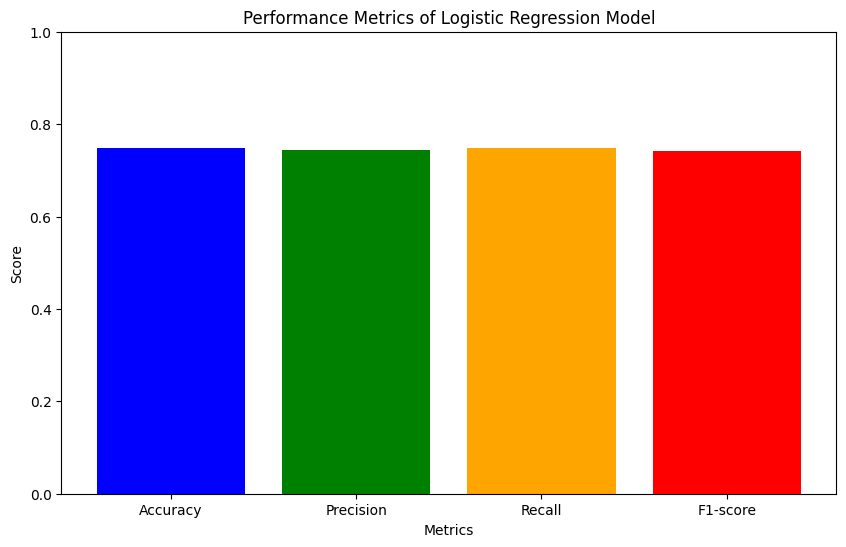

In [11]:
import matplotlib.pyplot as plt

# Metrics values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of Logistic Regression Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()

# KNN

Accuracy: 0.3581864454708267
Precision: 0.5730001977075734
Recall: 0.3581864454708267
F1-score: 0.24567955285071907
Confusion Matrix:
 [[ 141    6    8  619    0    2    3]
 [  35   30    8  504    0    1    2]
 [   5    5  184 2864    0    0   42]
 [  16    3   34 3256    1    3   14]
 [  29    0    2  197   18    1    1]
 [  18    0    6  500    1   30    2]
 [   2    0   34 1841    0    0  141]]


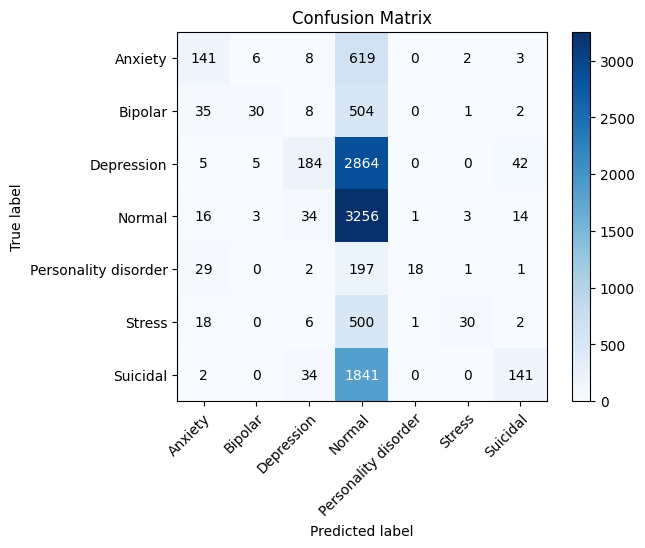

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Combined Data.csv')  # Path to your dataset

# Handle missing values in the 'statement' column (replace NaN with a placeholder string)
data['statement'] = data['statement'].fillna('No statement available')

# Separate features and target variable
X = data['statement']  # Column with the text data
y = data['status']  # Column with the sentiment labels (e.g., 'positive', 'negative', 'neutral', etc.)

# Handle missing values in the target variable (y) if any
y = y.fillna('neutral')  # Replace 'neutral' with an appropriate class if necessary

# Preprocess the text data (convert text into numerical format)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(X)

# Impute missing values in the features (X) if any (though unlikely here)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X.toarray())

# Encode the target variable (y) if it's categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", cm)

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Get class labels for the confusion matrix plot
class_labels = label_encoder.classes_

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels,  # Display class labels
       yticklabels=class_labels,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


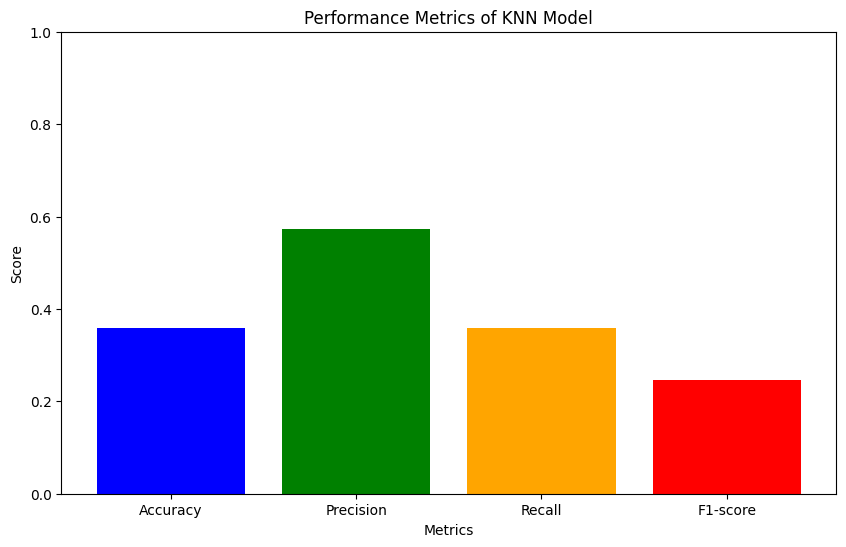

In [13]:
import matplotlib.pyplot as plt

# Metrics values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of KNN Model')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for scores
plt.show()

# Decision tree

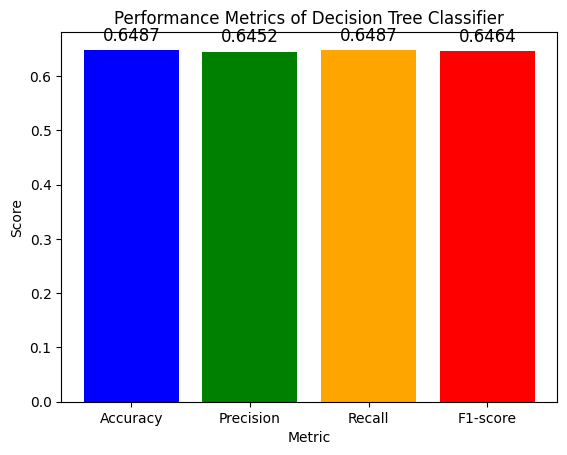

In [17]:
import matplotlib.pyplot as plt

# Define the data to plot (using the calculated metrics)
data = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels (the names of the metrics)
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a bar graph
plt.bar(labels, data.values(), color=['blue', 'green', 'orange', 'red'])

# Add a title and labels to the plot
plt.title('Performance Metrics of Decision Tree Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Display the value on top of each bar
for i, value in enumerate(data.values()):
    plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


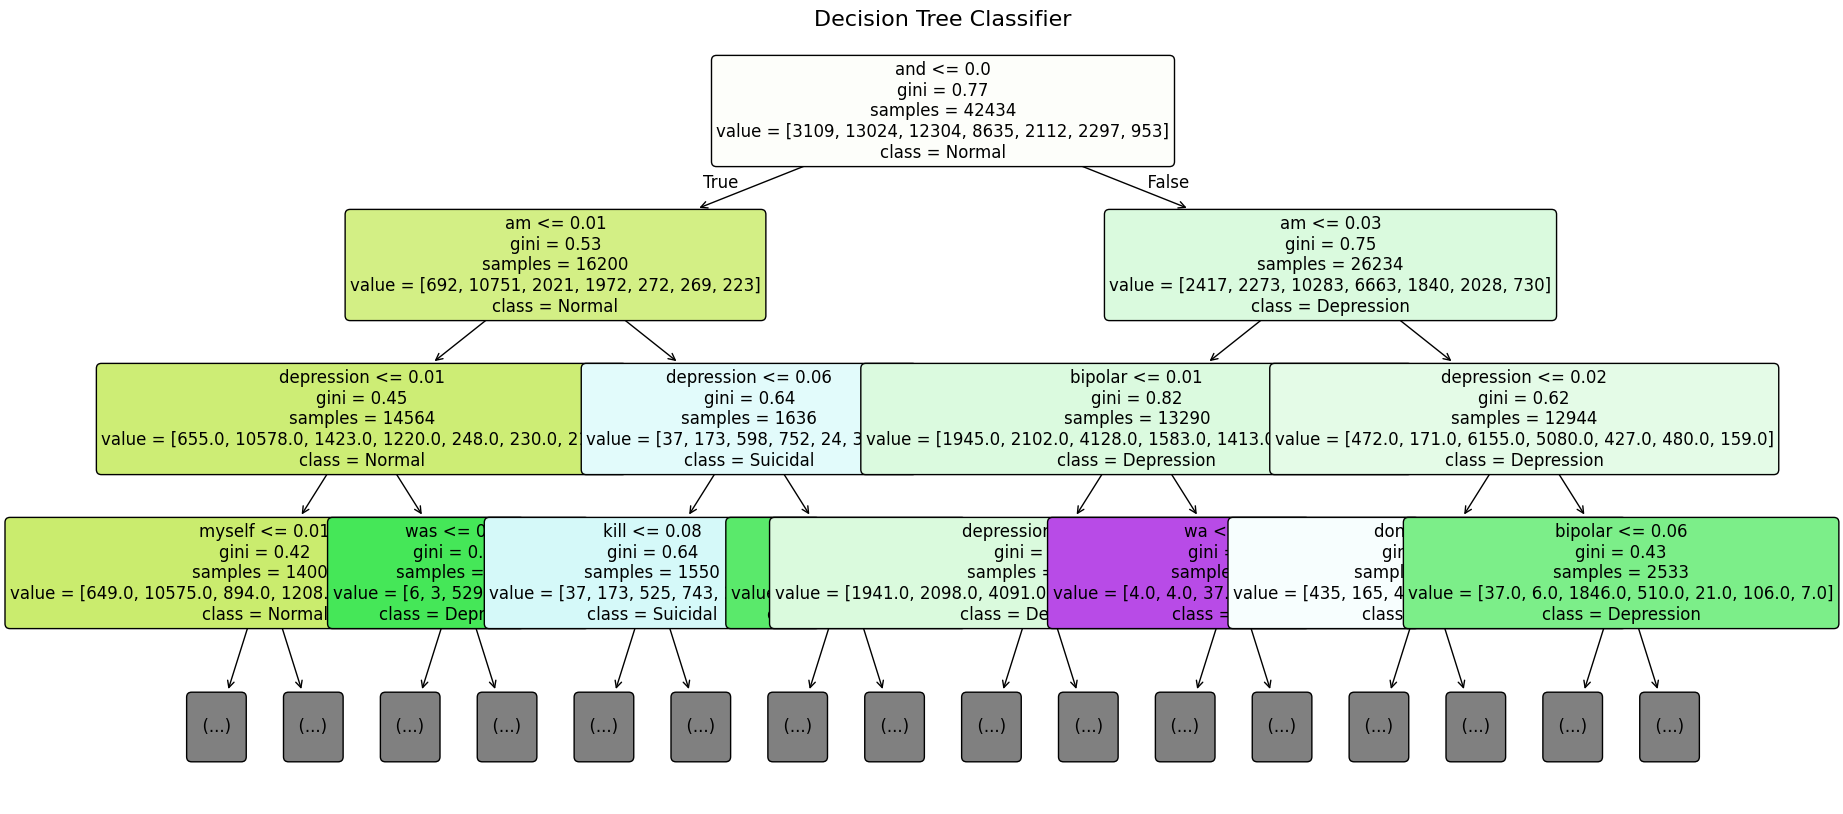

|--- and <= 0.00
|   |--- am <= 0.01
|   |   |--- depression <= 0.01
|   |   |   |--- myself <= 0.01
|   |   |   |   |--- restless <= 0.09
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restless >  0.09
|   |   |   |   |   |--- class: 0
|   |   |   |--- myself >  0.01
|   |   |   |   |--- don <= 0.03
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- don >  0.03
|   |   |   |   |   |--- class: 2
|   |   |--- depression >  0.01
|   |   |   |--- was <= 0.05
|   |   |   |   |--- meds <= 0.03
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- meds >  0.03
|   |   |   |   |   |--- class: 5
|   |   |   |--- was >  0.05
|   |   |   |   |--- think <= 0.08
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- think >  0.08
|   |   |   |   |   |--- class: 6
|   |--- am >  0.01
|   |   |--- depression <= 0.06
|   |   |   |--- kill <= 0.08
|   |   |   |   |--- to <= 0.01
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- to >  0.01
|   |   |   |   |   |--- class: 3
|   |   |  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


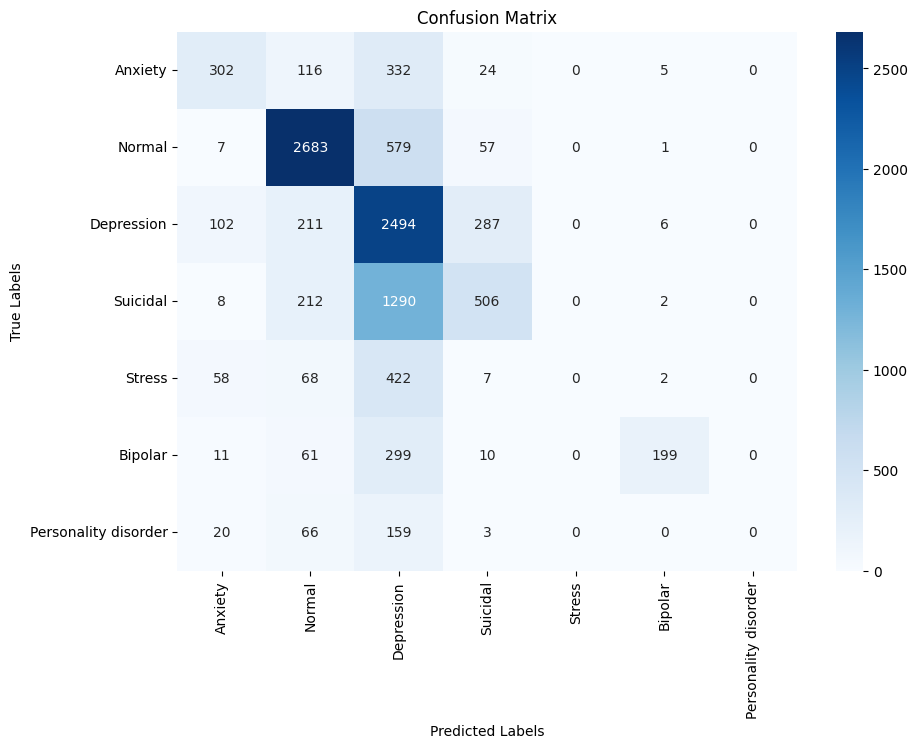

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import export_text

# Increase recursion depth to avoid errors while plotting large trees
sys.setrecursionlimit(1500)

# Load your dataset
df = pd.read_csv('/content/Combined Data.csv', index_col=0)
df.columns = df.columns.str.strip()  # Remove leading/trailing whitespaces from column names
df['statement'] = df['statement'].fillna('').astype(str)
df = df.dropna(subset=['status'])  # Drop rows where status is NaN

# Prepare the text and labels
texts = df['statement'].values
labels = df['status'].factorize()[0]  # Convert labels to numeric values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)  # Limit depth to prevent overfitting and recursion depth issues
model.fit(X_train_tfidf, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Increase the figure size for better visibility
plot_tree(model, filled=True, max_depth=3, feature_names=vectorizer.get_feature_names_out(),
          class_names=df['status'].unique(), rounded=True, fontsize=12, precision=2)
plt.title("Decision Tree Classifier", fontsize=16)
plt.show()

# Print out the textual representation of the decision tree for better interpretability
print(export_text(model, feature_names=vectorizer.get_feature_names_out()))

# Evaluate the model on test data
y_pred = model.predict(X_test_tfidf)

# Output classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=df['status'].unique()))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['status'].unique(), yticklabels=df['status'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# random classifier

Accuracy: 0.6659649343304217
Precision: 0.839218014246488
Recall: 0.4467514595442793
F1-score: 0.4976369908975372
Confusion Matrix:
 [[ 922    7  979  410    0    2   17]
 [  15  505  974  208    0    0   23]
 [  16    2 7500  657    0    0 1068]
 [  13    1  467 9297    0    1   49]
 [   3    0  475  139  101    0   13]
 [  50    1 1076  264    0  200   33]
 [   1    0 3014  653    0    0 2670]]


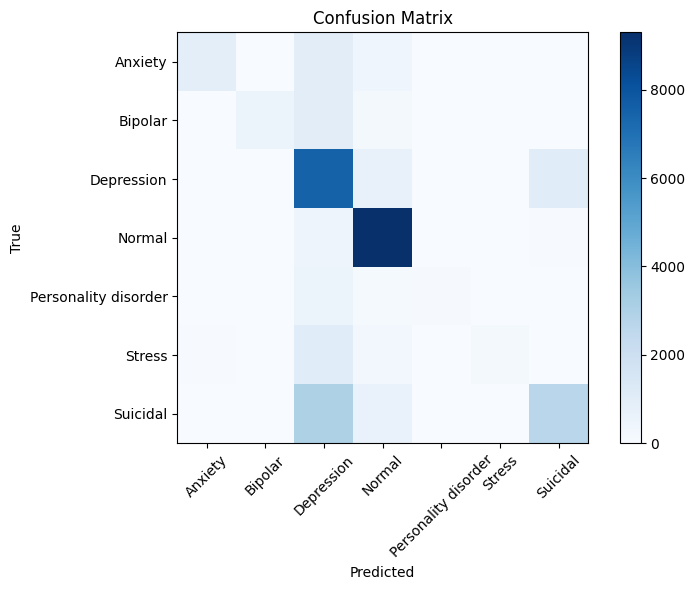

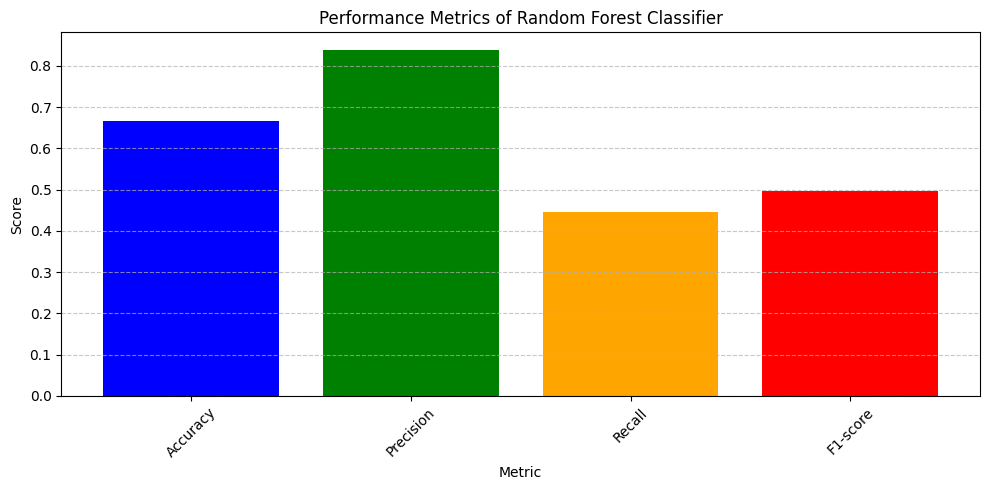

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Combined Data.csv')

# Handle missing values in 'statement' column by replacing NaN with an empty string
data['statement'] = data['statement'].fillna('')

# Separate features and target variable
X = data['statement']  # Text data (feature)
y = data['status']  # Target variable

# Encode the target variable (status)
le = LabelEncoder()
y = le.fit_transform(y)  # Encode the 'status' column (e.g., 'ckd', 'non-ckd')

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.6, random_state=42)

# Create and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision (macro average for multi-class)
precision = precision_score(y_test, y_pred, average='macro')

# Calculate recall (macro average for multi-class)
recall = recall_score(y_test, y_pred, average='macro')

# Calculate F1-score (macro average for multi-class)
f1 = f1_score(y_test, y_pred, average='macro')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Get the number of classes from the confusion matrix
class_labels = le.classes_  # This gives the actual class labels
tick_locations = range(len(class_labels))  # Set tick locations based on the number of classes

# Map class labels to ticks
plt.xticks(tick_locations, class_labels, rotation=45)  # Rotate class labels for better readability
plt.yticks(tick_locations, class_labels)

# Color bar
plt.colorbar()

# Show plot
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot the bar graph for accuracy, precision, recall, and F1-score
data_metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

labels = list(data_metrics.keys())

plt.figure(figsize=(10, 5))  # Set figure size
plt.bar(labels, data_metrics.values(), color=['blue', 'green', 'orange', 'red'])

plt.title('Performance Metrics of Random Forest Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


# SVM

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety
Non-numeric columns: Index(['statement'], dtype='object')
Accuracy: 0.6918871363036511
Precision: 0.6922311465412724
Recall: 0.6918871363036511
F1-score: 0.6697732031123859
Confusion Matrix:
 [[ 962    0   14  146   35    0    0]
 [   0  814    0   12   38    0    0]
 [   0  390 3569   58    0   27  564]
 [  72    0  348 4374    0  199    0]
 [  11   20    0    0  339    0    0]
 [   0  377    2  165    0  275    0]
 [  72    0 2201  124    0   28  677]]


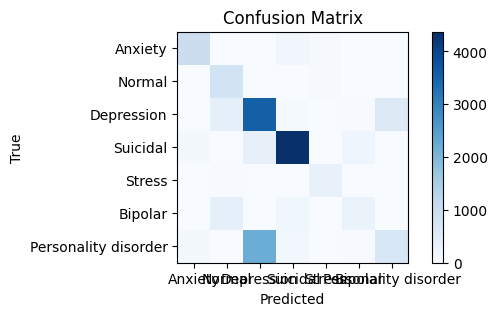

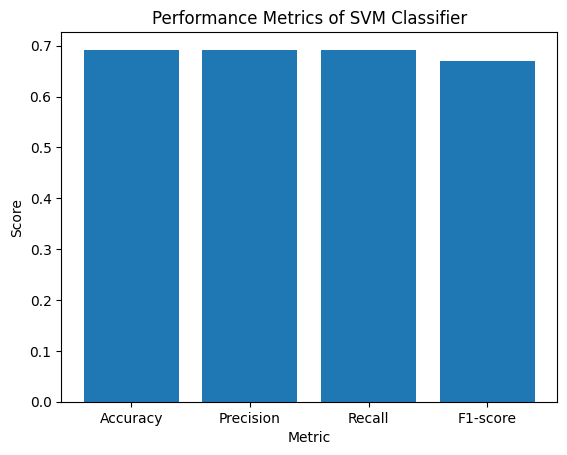

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Combined Data.csv')

# Display the first few rows to understand the dataset structure
print(data.head())

# Separate features and target variable
# Assuming 'status' is the target variable
X = data.drop('status', axis=1)  # 'status' is the target variable
y = data['status']

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Encode non-numeric columns
le = LabelEncoder()
for col in non_numeric_cols:
    X[col] = le.fit_transform(X[col])

# Impute missing values for numerical columns
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the SVM classifier
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision using 'weighted' averaging for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall using 'weighted' averaging for multiclass classification
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score using 'weighted' averaging for multiclass classification
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 3))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()

# Update the class labels based on the actual target values (e.g., unique classes in 'status')
class_labels = y.unique()
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)

plt.show()

# Define the data to plot
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels
labels = list(metrics.keys())

# Create a bar graph
plt.bar(labels, metrics.values())

# Add a title and labels
plt.title('Performance Metrics of SVM Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()


# Naive bayes

Accuracy: 0.6360837051467354
Precision: 0.6523257590759816
Recall: 0.5160333467228511
F1-score: 0.5378093949452454
Confusion Matrix:
 [[ 817   26  239   60    1    8    6]
 [  27  496  266   59    0    3   13]
 [ 110   85 3147  127    9   16 1114]
 [ 140   48 1215 3292   18   41  239]
 [   4    9  256   47   45    5    4]
 [ 113   16  504   30    0  132   24]
 [  12   11  811   54    3   18 2193]]


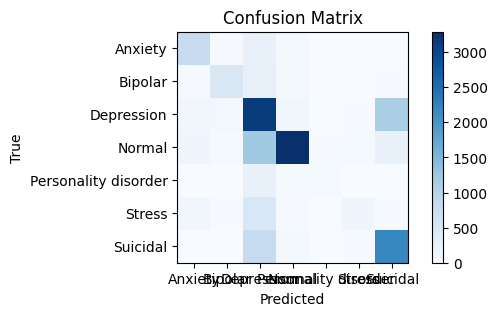

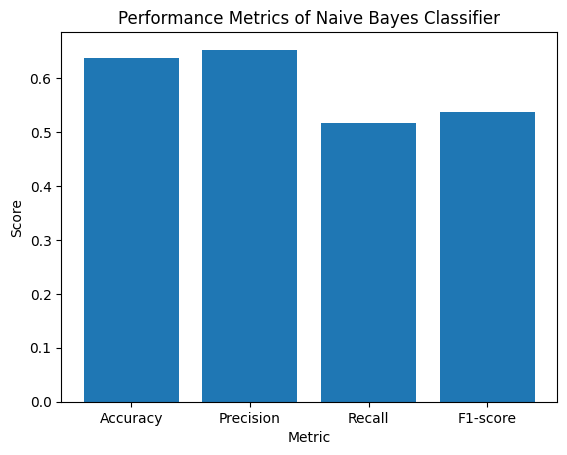

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
data = pd.read_csv('/content/Combined Data.csv')

# Separate features and target variable
X = data['statement']  # The 'statement' column is the feature
y = data['status']     # The 'status' column is the target variable

# Handle missing values in the 'statement' column by replacing NaN with an empty string or 'missing'
X = X.fillna('missing')

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Convert the 'statement' column to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# Impute missing values if necessary (you can apply this step depending on your data)
# In this case, since 'X' is a sparse matrix, there's no need to impute missing values for 'X'.
# Imputation would only apply if we had other columns with missing values.

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' is used for multiclass

# Calculate recall
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' is used for multiclass

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' is used for multiclass

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(6, 3))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_)  # Set labels according to the classes
plt.yticks(range(len(le.classes_)), le.classes_)  # Set labels according to the classes
plt.show()

# Define the data to plot
data_metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

# Define the x-axis labels
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create a bar graph
plt.bar(labels, data_metrics.values())

# Add a title and labels
plt.title('Performance Metrics of Naive Bayes Classifier')
plt.xlabel('Metric')
plt.ylabel('Score')

# Show the plot
plt.show()


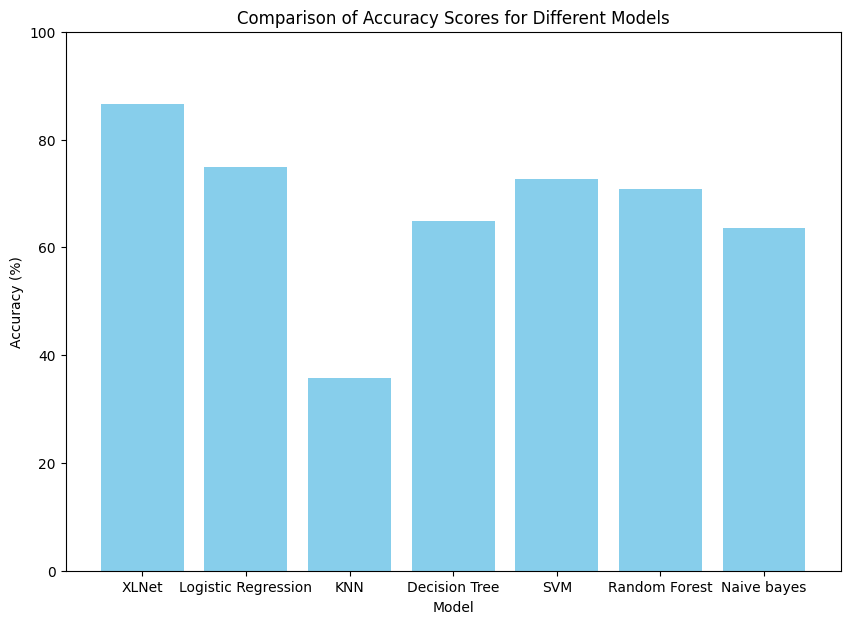

In [34]:
import matplotlib.pyplot as plt

# Define the models and their accuracy scores
models = ['XLNet','Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'Naive bayes']
accuracies = [86.56, 74.82, 35.81, 64.87, 72.74,70.81,63.60]  # Replace 99.20 with the actual ANN accuracy if available

# Create the bar graph
plt.figure(figsize=(10, 7))
plt.bar(models, accuracies, color='skyblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100 for percentage

# Display the graph
plt.show()
